In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [99]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200


In [100]:
def get_lattice(filename):
    with open(filename, "r") as f:
        w, h, E, T = f.readline().split(" ")
        w = int(w)
        h = int(h)
        E = float(E)
        lattice = []
        for i in range(w*h):
            x, y, z = f.readline().split(" ")
            x = float(x)
            y = float(y)
            z = float(z)
            lattice.append([x, y, z])
    return np.reshape(np.array(lattice), (w, h, 3)), E, T


In [101]:
filename = "build/magsim/lattice.dump0"
lattice, E, T = get_lattice(filename)

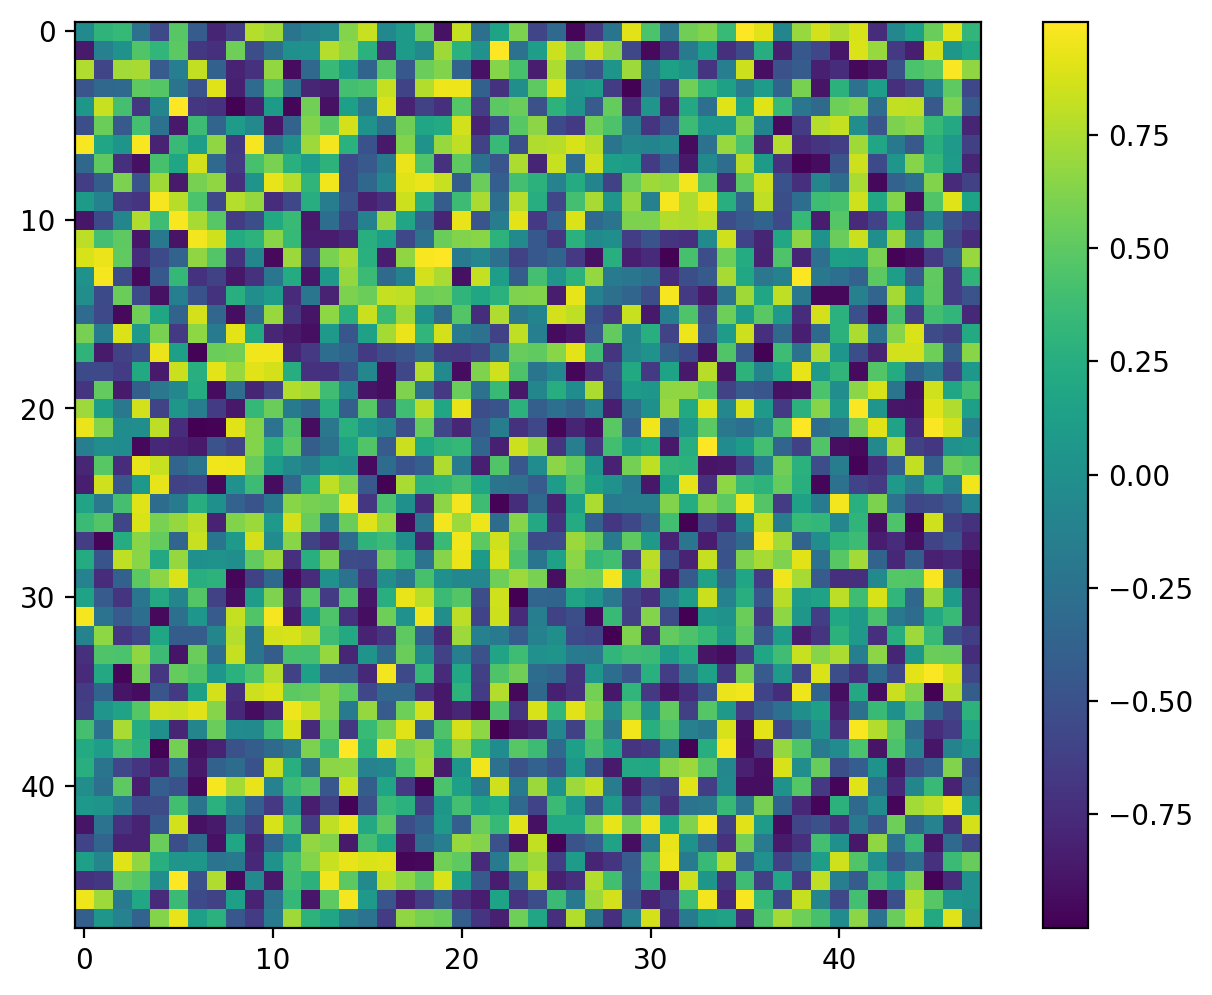

In [102]:
plt.imshow(lattice[:,:,2])
plt.colorbar()

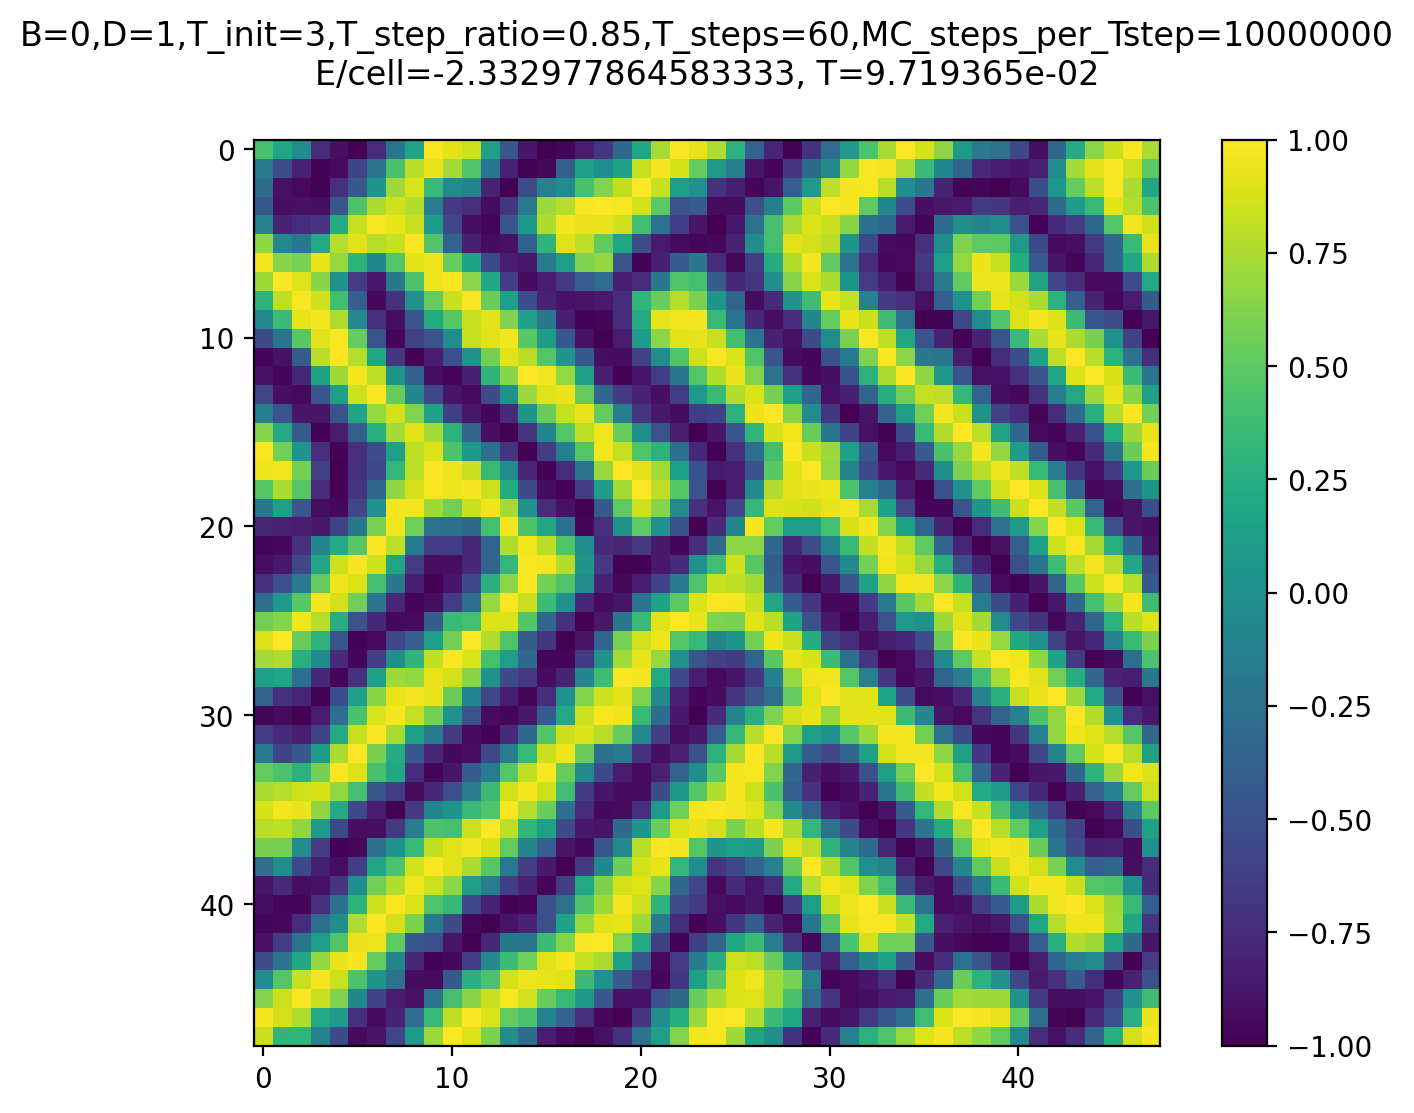

In [106]:
fig, ax1 = plt.subplots(1, 1)
im1 = ax1.imshow(lattice[:,:,2], vmax=1, vmin=-1)
plt.title("B=0,D=0.1,T_init=3,T_step_ratio=0.8,T_steps=40,MC_steps_per_Tstep=3000000\nE={}".format(E))
fig.colorbar(im1)
# animation function.  This is called sequentially
def animate(i):
    lattice, E, T = get_lattice("build/magsim/lattice.dump" + str(i))
    im1.set_array(lattice[:,:,2])
    N = lattice.shape[0]*lattice.shape[1]
    ax1.set_title("B=0,D=1,T_init=3,T_step_ratio=0.85,T_steps=60,MC_steps_per_Tstep=10000000\nE/cell={}, T={}".format(E/N, T))
#     Ecum.append(E)
#     ax2.plot(Ecum)


anim = animation.FuncAnimation(fig, animate,
                               frames=50, interval=200)

# HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

# plt.show()

In [ ]:
mywriter = animation.FFMpegWriter()
anim.save('mymovie.mp4',writer=mywriter)